<a href="https://colab.research.google.com/github/Shrutakeerti/Winter-LLM/blob/main/Vizuara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
<ipython-input-2-dd1d61f575d3>:57: FutureWarning: The behavior of DataFram

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/304M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/828k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/304M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/828k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/304M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

   Language Pair Iterations  \
0          en-fr          1   
1          en-fr          2   
2          en-fr          3   
3          en-fr          4   
4          en-fr          5   
5          en-hi          1   
6          en-hi          2   
7          en-hi          3   
8          en-hi          4   
9          en-hi          5   
10         fr-de          1   
11         fr-de          2   
12         fr-de          3   
13         fr-de          4   
14         fr-de          5   

                                             Original  \
0   Hey Radha,hope you are doing well.Wanna grab s...   
1   Hey Radha,hope you are doing well.Wanna grab s...   
2   Hey Radha,hope you are doing well.Wanna grab s...   
3   Hey Radha,hope you are doing well.Wanna grab s...   
4   Hey Radha,hope you are doing well.Wanna grab s...   
5   Hey Radha,hope you are doing well.Wanna grab s...   
6   Hey Radha,hope you are doing well.Wanna grab s...   
7   Hey Radha,hope you are doing well.Wanna gra

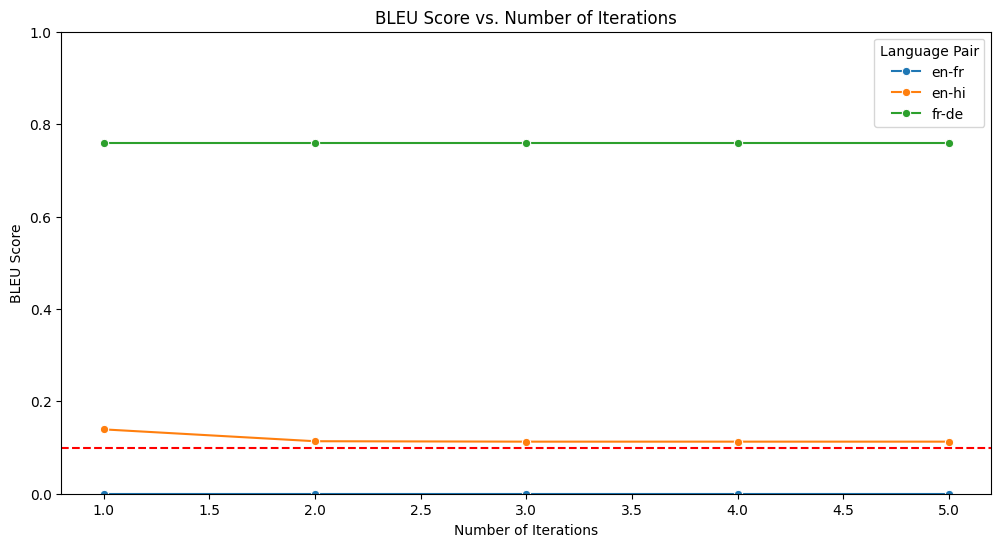

In [2]:
# Install necessary libraries
!pip install transformers torch pandas matplotlib seaborn

from transformers import MarianMTModel, MarianTokenizer
import pandas as pd
from sklearn.metrics import jaccard_score
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform translation
def translate(text, src_lang, tgt_lang):
    # Load model and tokenizer
    model_name = f'Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}'
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    # Tokenize and encode the text
    translated = model.generate(tokenizer.encode(text, return_tensors='pt'))
    translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)

    return translated_text

# List of language pairs
language_pairs = [('en', 'fr'), ('en', 'hi'), ('fr', 'de')]  # Add more pairs as needed
input_text = "Hey Radha,hope you are doing well.Wanna grab some coffee today.Then we can roam in the streets of Venice.It would be so much fun"

# Initialize DataFrame to store results
results = pd.DataFrame(columns=["Language Pair", "Iterations", "Original", "Final", "BLEU Score", "Intermediate Translations"])

# Function to calculate BLEU score
def calculate_bleu(original, final):
    return sentence_bleu([original.split()], final.split())

# Run experiments
for src_lang, tgt_lang in language_pairs:
    for iterations in range(1, 6):  # Modify the range for the desired number of iterations
        text = input_text
        intermediate_translations = [f"Iteration 0 ({src_lang}): {text}"]  # Track each iteration's output
        for i in range(iterations):
            text = translate(text, src_lang, tgt_lang)
            intermediate_translations.append(f"Iteration {i+1} ({tgt_lang}): {text}")
            text = translate(text, tgt_lang, src_lang)
            intermediate_translations.append(f"Iteration {i+1} ({src_lang}): {text}")

        bleu_score = calculate_bleu(input_text, text)

        # Store the results along with intermediate translations for better insight
        new_row = {
            "Language Pair": f"{src_lang}-{tgt_lang}",
            "Iterations": iterations,
            "Original": input_text,
            "Final": text,
            "BLEU Score": bleu_score,
            "Intermediate Translations": "\n".join(intermediate_translations)
        }
        results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

# Save results to a CSV file
results.to_csv("translation_results.csv", index=False)

# Print the results DataFrame for verification
print(results)

# Plot BLEU Scores
plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x='Iterations', y='BLEU Score', hue='Language Pair', marker='o')
plt.title('BLEU Score vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('BLEU Score')
plt.ylim(0, 1)
plt.axhline(0.1, color='red', linestyle='--')  # Example threshold line
plt.show()
